# Telco Customer Churn EDA + Power BI Key Influencers Visual (display only)

In [1]:
# toolboxes/libraries
import pandas as pd
import numpy as np

# Visualization libraries

import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [2]:
# import data set
url = 'https://raw.githubusercontent.com/santamm/telecom-customer-churn-prediction/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# note:
# There're 11 rows that 'TotalCharge' are blanks, causing 'TotalCharge' datatype read as 'object' when importing

df = pd.read_csv(url, sep=',', na_values=[" "])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# change the data type to catgory

df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

https://towardsdatascience.com/customer-churn-analysis-eda-a688c8a166ed

Target:

    Churn — Whether the customer churned or not (Yes, No)

Numeric Features:

    Tenure — Number of months the customer has been with the company
    MonthlyCharges — The monthly amount charged to the customer
    TotalCharges — The total amount charged to the customer

Categorical Features:

    CustomerID
    Gender — M/F
    SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
    Partner — Whether customer has a partner or not (Yes, No)
    Dependents — Whether customer has dependents or not (Yes, No)
    PhoneService — Whether the customer has a phone service or not (Yes, No)
    MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
    InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
    OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
    OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
    DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
    TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
    StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
    StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
    Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
    PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
    PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Total missing values, NA, for each feature
print (df.isnull().sum() )

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
# drop any na
df=df.dropna()
print('The dataset has', df.shape[0] , 'rows and', df.shape[1], 'columns.')

The dataset has 7032 rows and 21 columns.


In [7]:
# Looking for logical errors in the dataset

print('Number of rows with duplicated customerID:', df[df.groupby('customerID')['customerID'].transform('size') > 1].shape[0]) 
print('Number of rows with bigger MonthlyCharges than TotalCharges:', df[df.MonthlyCharges > df.TotalCharges].shape[0])
#print('Number of rows of total charges do not equal each tenures times monthly charges:', df[df.MonthlyCharges*df.tenure != df.TotalCharges].shape[0])
print('Nbr of rows with no internet service, BUT with online services:')
for service in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']:
    print(service, ':', df[(df.InternetService != 'No') & (df[service] == 'No internet service')].shape[0])


Number of rows with duplicated customerID: 0
Number of rows with bigger MonthlyCharges than TotalCharges: 0
Nbr of rows with no internet service, BUT with online services:
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
StreamingTV : 0
StreamingMovies : 0


In [8]:
# split the dataset into numeric and objects to facilitate the analysis
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

In [9]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
# Take a transpose to take the statistic of the variables

objects_ds.describe().T

,count,unique,top,freq
customerID,7032,7032,7711-GQBZC,1
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087


In [11]:
df.groupby('Churn').size()  # it is imbalance dataset

Churn
No     5163
Yes    1869
dtype: int64

In [12]:
# https://github.com/ShivaliPatel/Data-science-projects/blob/master/Telco_customer_churn/Notebooks/Telecom%20Churn%20Prediction-v2.ipynb

plotColor = ['b','g','r','m','c', 'y']
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

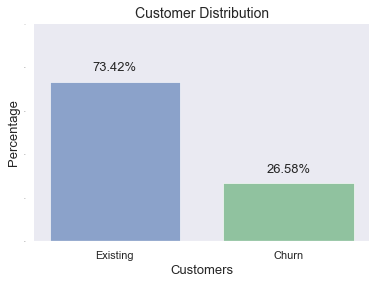

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


In [13]:
Churn_rate = df['Churn'].value_counts() / df.shape[0]
Generate_bar_graph(Churn_rate.index.map({'No':'Existing','Yes':"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print(Churn_rate)


#### Meaning around 26% of the subscribers left the company during given interval.

###  Graphical Analysis

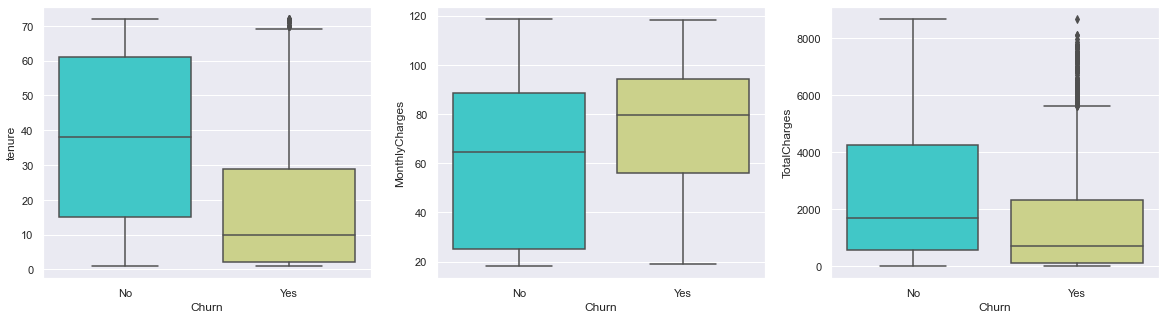

In [14]:
# box plots
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=df,palette='rainbow',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=df,palette='rainbow',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=df,palette='rainbow',ax = axes[2])

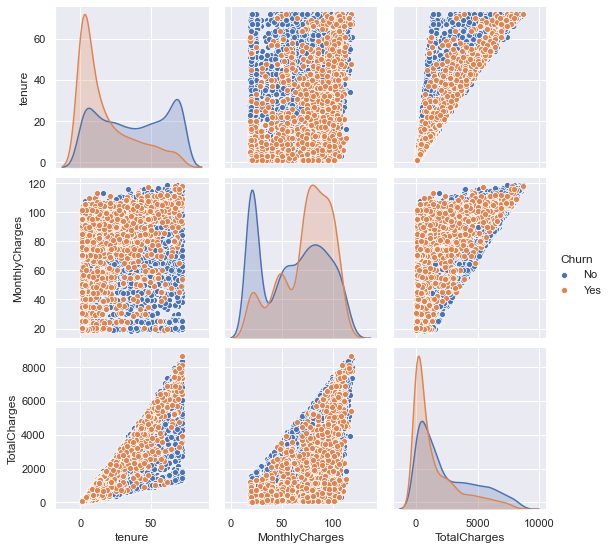

In [15]:
numeric_ds_churn = pd.concat([numeric_ds,df["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset
#g = sns.PairGrid(numeric_ds_churn.sample(n=1000), hue="Churn")
#g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
#g = g.map_diag(sns.kdeplot)
#g = g.add_legend()
sns.pairplot(numeric_ds_churn, hue="Churn")

### Custumer Tenure analysis

In [16]:
temp_tenure = np.array(df["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 1
max: 72


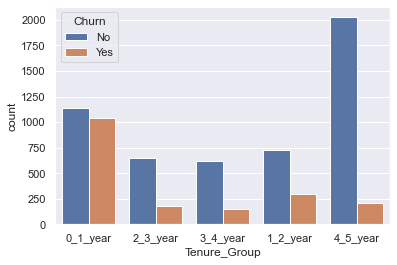

In [17]:
# assign tenure into bins

def tenure_to_group(data):
    if data["tenure"] <=12:
        return "0_1_year"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "1_2_year"
    elif (data["tenure"] > 24) & (data["tenure"] <= 36) :
        return "2_3_year"
    elif (data["tenure"] > 36) & (data["tenure"] <= 48) :
        return "3_4_year"
    elif data["tenure"] > 48 & (data["tenure"] <= 60):
        return "4_5_year"
    elif data["tenure"] > 60 & (data["tenure"] <= 72):
        return "5_6_year"
    
df["Tenure_Group"] = df.apply(lambda df:tenure_to_group(df),axis = 1)
sns.countplot(x=df["Tenure_Group"],hue="Churn", data=df)



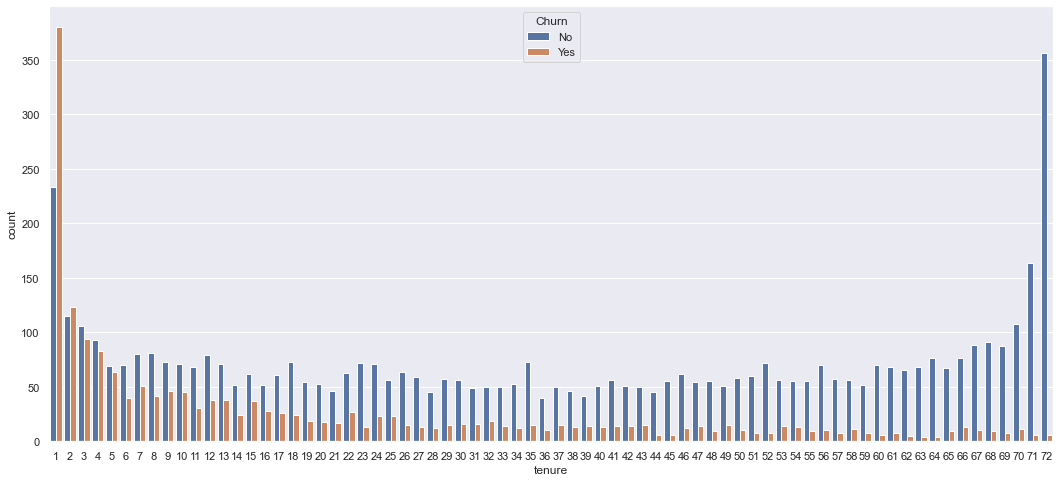

In [18]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(df["tenure"],hue = df["Churn"])

### most of the churn happens among new customers (mode of CustomerLifetimeMonths = 1)
### the monthlyCharges and the totalCharges can be very different, they vary between very small and quite big values

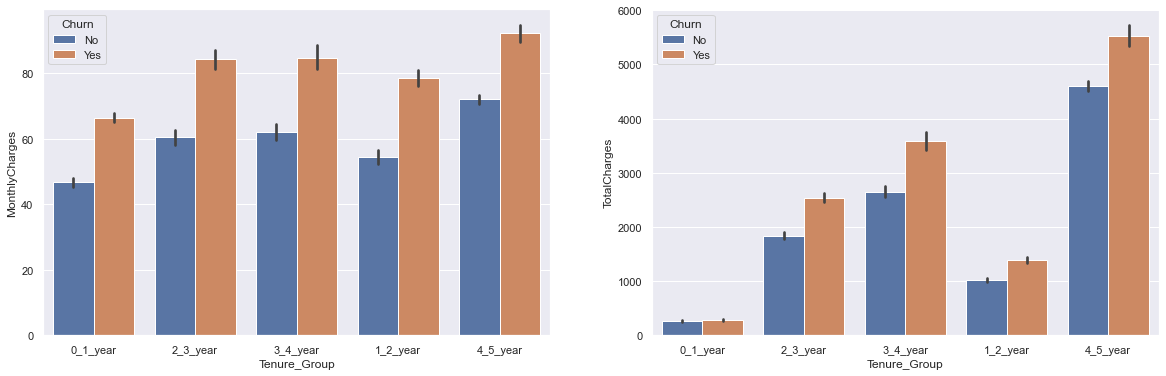

In [19]:
# histogram plots
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=df,hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=df,hue = "Churn",ax = axes[1])

#### more likely to leave company who's tenure is less than a year
#### more likely to have more than $65 monthly charges

#### The customers paying high monthly fees churn more.

In [20]:
# https://github.com/ShivaliPatel/Data-science-projects/blob/master/Telco_customer_churn/Notebooks/Telecom%20Churn%20Prediction-v2.ipynb
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2
                    , bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%'
                    , ha = 'center'
                    , fontsize = 13)
            
            
def Categorical_var_churn_dist(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')
        
        plt_cat = sns.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col=distribution_col
                , kind='bar'
                , aspect = 0.8
                , palette = plotColor
                , alpha = 0.6)
        
        if feature == 'PaymentMethod':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
        
        
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)
            Create_data_label(ax2)
        
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribution",fontsize=14)
    plt.show()



### Gender, SeniorCitizen, Partner, Dependents

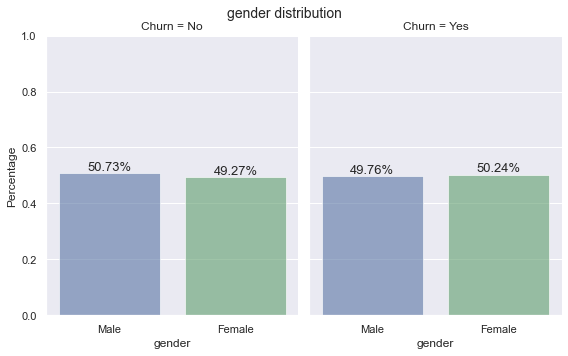

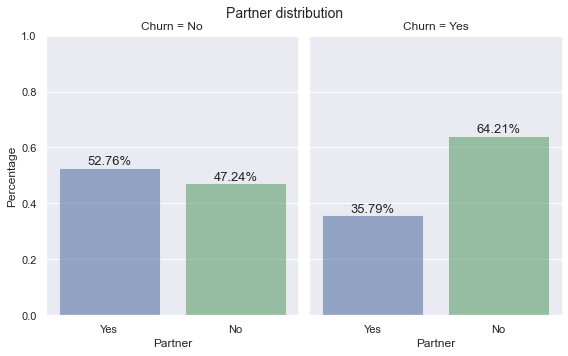

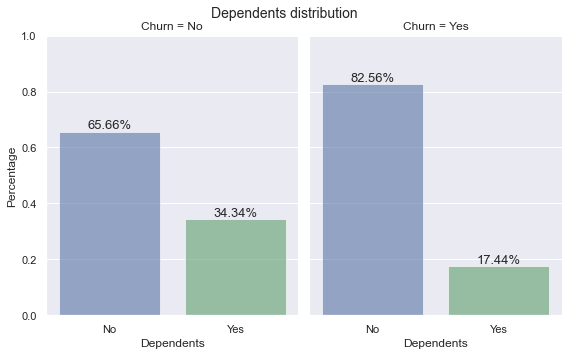

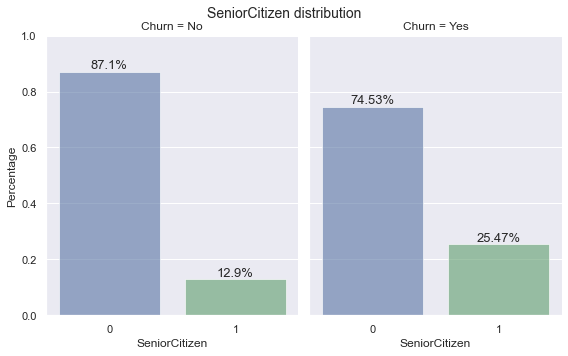

In [21]:
cat_cols = ["gender","Partner","Dependents","SeniorCitizen"]
churn_summary = df.groupby('Churn')
Categorical_var_churn_dist(churn_summary, cat_cols,'Churn')


#### Gender alone does not help us predict the customer churn.
#### If a person is young and has a family, he or she is less likely to stop the service. The reason might be the busy life, more money or another factors.


### Phone Service , MultipleLines and InternetService

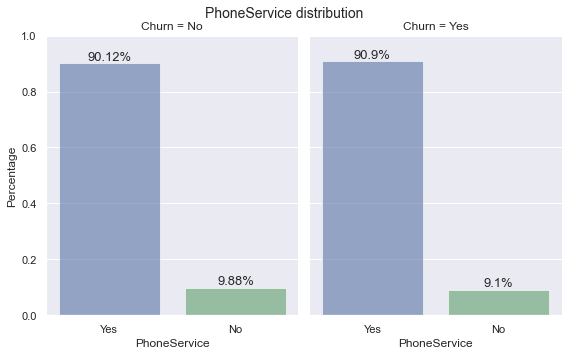

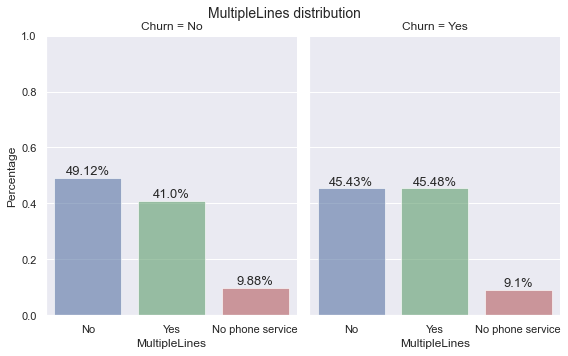

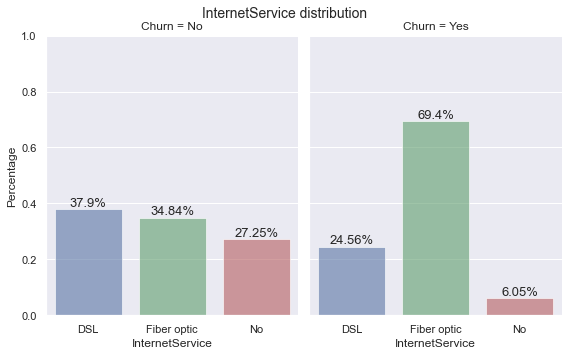

In [22]:
cat_cols = ["PhoneService","MultipleLines","InternetService"]

Categorical_var_churn_dist(churn_summary, cat_cols,'Churn')


#### As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.
#### When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics.

### Add-On Services: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

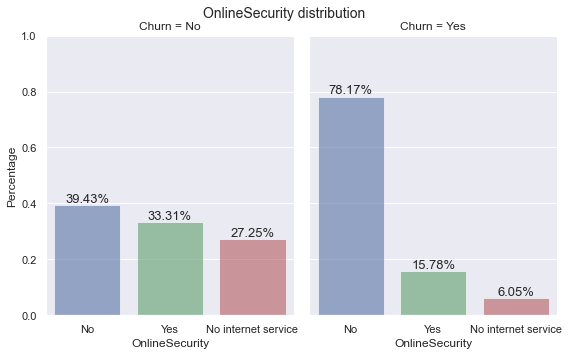

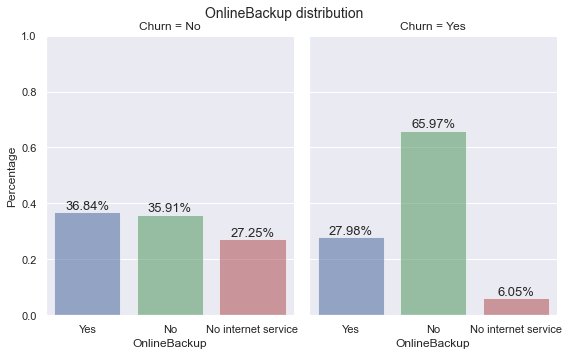

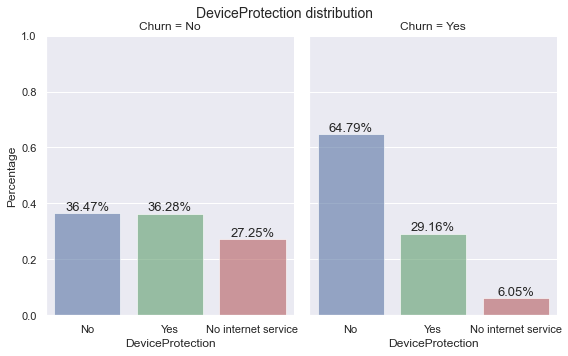

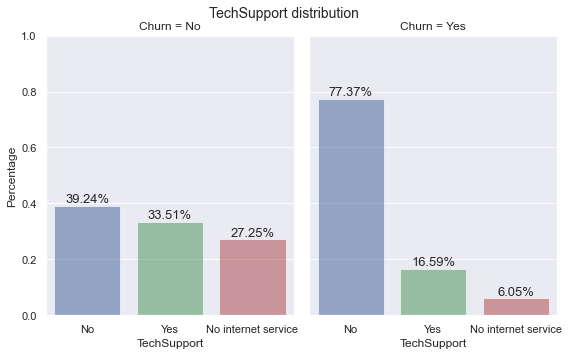

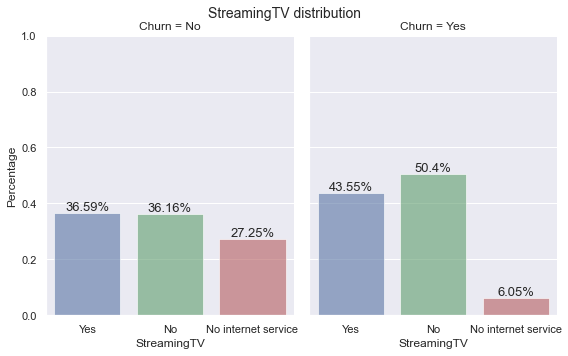

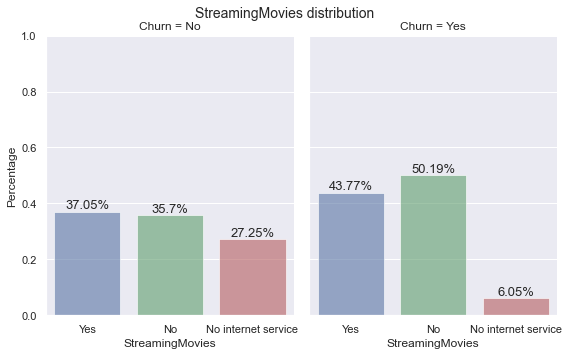

In [23]:
cat_cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

Categorical_var_churn_dist(churn_summary, cat_cols,'Churn')

####  If a person does not choose for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not choose for specific service their probability of churning is high.

### Contract, PaperlessBilling , and PaymentMethod

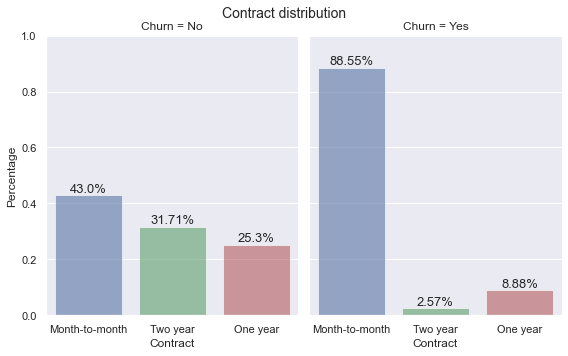

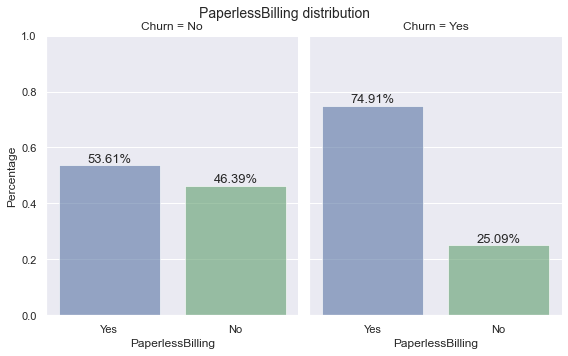

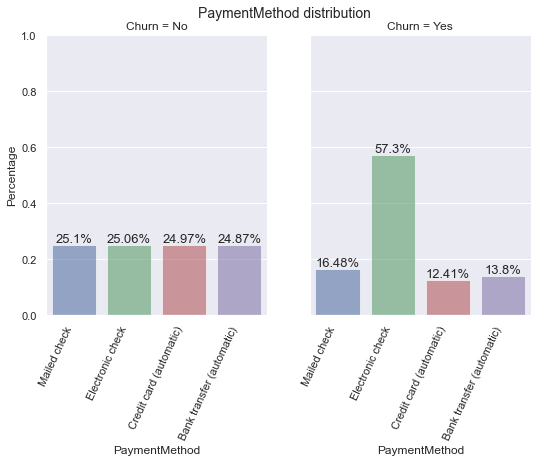

In [24]:
cat_cols = ["Contract","PaperlessBilling","PaymentMethod"]

Categorical_var_churn_dist(churn_summary, cat_cols,'Churn')

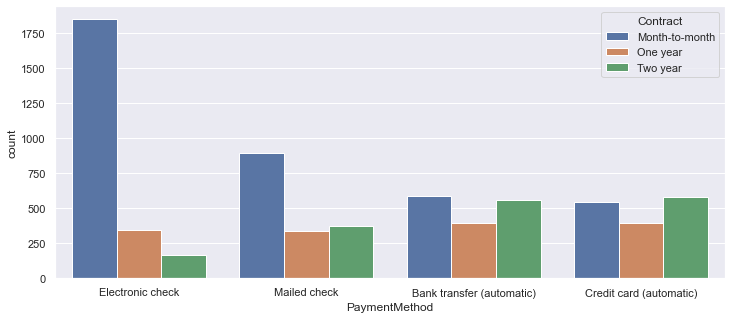

In [25]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(df.PaymentMethod, hue = df.Contract, ax = ax)

####  Month-to-month contract , Electronic check, Churn rate is very high

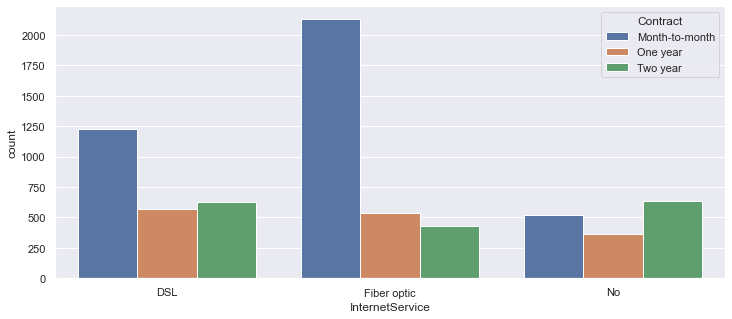

In [26]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(df.InternetService, hue = df.Contract, ax = ax)

#### Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

### For those who unsubscribed the service, what was their average LTV(Life Time Value)? and how long did they usually stay in the service?

In [27]:
Churn_df = numeric_ds_churn.query('Churn=="Yes"')
Churn_df["CLTV"] = numeric_ds_churn["tenure"] * numeric_ds_churn["MonthlyCharges"]
Churn_df.head()

<ipython-input-27-b48847768888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_df["CLTV"] = numeric_ds_churn["tenure"] * numeric_ds_churn["MonthlyCharges"]


,tenure,MonthlyCharges,TotalCharges,Churn,CLTV
2,2,53.85,108.15,Yes,107.7
4,2,70.70,151.65,Yes,141.4
5,8,99.65,820.50,Yes,797.2
8,28,104.80,3046.05,Yes,2934.4
13,49,103.70,5036.30,Yes,5081.3


In [28]:
Churn_df.describe()

,tenure,MonthlyCharges,TotalCharges,CLTV
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094,1531.608828
std,19.531123,24.666053,1890.822994,1886.774930
min,1.000000,18.850000,18.850000,18.850000
25%,2.000000,56.150000,134.500000,137.900000
50%,10.000000,79.650000,703.550000,700.000000
75%,29.000000,94.200000,2331.300000,2334.800000
max,72.000000,118.350000,8684.800000,8481.600000


#### Average LTV is about $1532 and about average 18 months stay in service

###  For those who are still paying the service, what was their average LTV(Life Time Value)? and how long did they usually stay in the service?

In [29]:
Churn_df = numeric_ds_churn.query('Churn=="No"')
Churn_df["CLTV for Non Churn"] = numeric_ds_churn["tenure"] * numeric_ds_churn["MonthlyCharges"]
Churn_df.describe()

<ipython-input-29-371a79fae01c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Churn_df["CLTV for Non Churn"] = numeric_ds_churn["tenure"] * numeric_ds_churn["MonthlyCharges"]


,tenure,MonthlyCharges,TotalCharges,CLTV for Non Churn
count,5163.00000,5163.000000,5163.000000,5163.000000
mean,37.65001,61.307408,2555.344141,2555.203283
std,24.07694,31.094557,2329.456984,2327.899069
min,1.00000,18.250000,18.800000,18.800000
25%,15.00000,25.100000,577.825000,580.400000
50%,38.00000,64.450000,1683.600000,1691.750000
75%,61.00000,88.475000,4264.125000,4252.800000
max,72.00000,118.750000,8672.450000,8550.000000


#### Average LTV is about $2555 and about average 37.6 months stay in service

### what kinds of service they subscribed when they were still staying in subscription? what are the proportions of each kinds of service?

#### From above graphs, Phone Service (90.12%) , MultipleLines (41.0%), InternetService(37.9% DSL; 34.84% Fiber), OnlineSecurity(33.31%), OnlineBackup(35.91%), DeviceProtection(36.26%), TechSupport(33.51%), StreamingTV(36.59%), StreamingMovies (37.05%)

In [30]:
df2 = df.copy()
df2["LTV"] = df2["tenure"]*df2["MonthlyCharges"]

select_columns =["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Tenure_Group" ,"Churn", "LTV"]

select_df =df2[select_columns].query('InternetService != "No"')
select_df.sample(10)

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure_Group,Churn,LTV
3564,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,4_5_year,No,5698.35
2140,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,2_3_year,Yes,2842.95
1254,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,No,4_5_year,No,4884.00
1585,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,3_4_year,No,3378.90
2343,Yes,No,DSL,No,No,No,No,No,No,0_1_year,No,138.30
5053,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,1_2_year,No,1279.20
6882,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,4_5_year,No,7075.15
6071,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,4_5_year,No,7599.60
4469,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,4_5_year,No,4505.00
3517,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,4_5_year,Yes,7665.00


For those who are still in service with LTV more than the LTV of leaked customers, which service they are paying the most?

#### MultipleLines and Fiber Optic with Online Secuity , Device Protection,Tech support , Streaming TV and Movie

In [31]:
# https://github.com/andrewcole33/telco_churn_analysis/blob/master/eda_module.py

def plot_service_charges(df):
    
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (40, 20),  sharey = True)
    
    copy1 = df
    a = sns.violinplot('PhoneService', 'LTV', 'Churn', copy1, split = True, ax = axes[0])
    a.set_title('Phone Service', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Has Service', fontweight = 'bold', fontsize = 30)
    a.set_xticklabels(['No Phone', 'Phone'], size = 30, weight = 'bold',rotation = 30)
    a.set_ylabel('LTV ($)', fontweight = 'bold', fontsize = 30)
    a.set_yticklabels(a.get_yticks(), size = 30, weight = 'bold')
    a.legend(loc = 'upper left',fontsize = 25 )
    a.legend_.set_title('Churn', prop = {'size': 25, 'weight':'bold'})

    copy2 = df
    b = sns.violinplot('MultipleLines', 'LTV', 'Churn', copy2, split = True, ax = axes[1])
    b.set_title('Multiple Lines', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('Has Service', fontweight = 'bold', fontsize = 30)
    b.set_xticklabels( ['No Phone Service', 'Singular Line', 'Multiple Lines'], size = 30, weight = 'bold',rotation = 30)
    b.set_ylabel('')
    b.legend_.remove()
    
    copy3 = df
    c = sns.violinplot('InternetService', 'LTV', 'Churn', copy3, split = True, ax = axes[2])
    c.set_title('Internet Service', fontweight = 'bold', fontsize = 30)
    c.set_xlabel('Has Service', fontweight = 'bold', fontsize = 30)
    c.set_xticklabels(['DSL', 'Fiber Optic', 'No Internet Service'], size = 30, weight = 'bold',rotation = 30)
    c.set_ylabel('')
    c.legend_.remove()

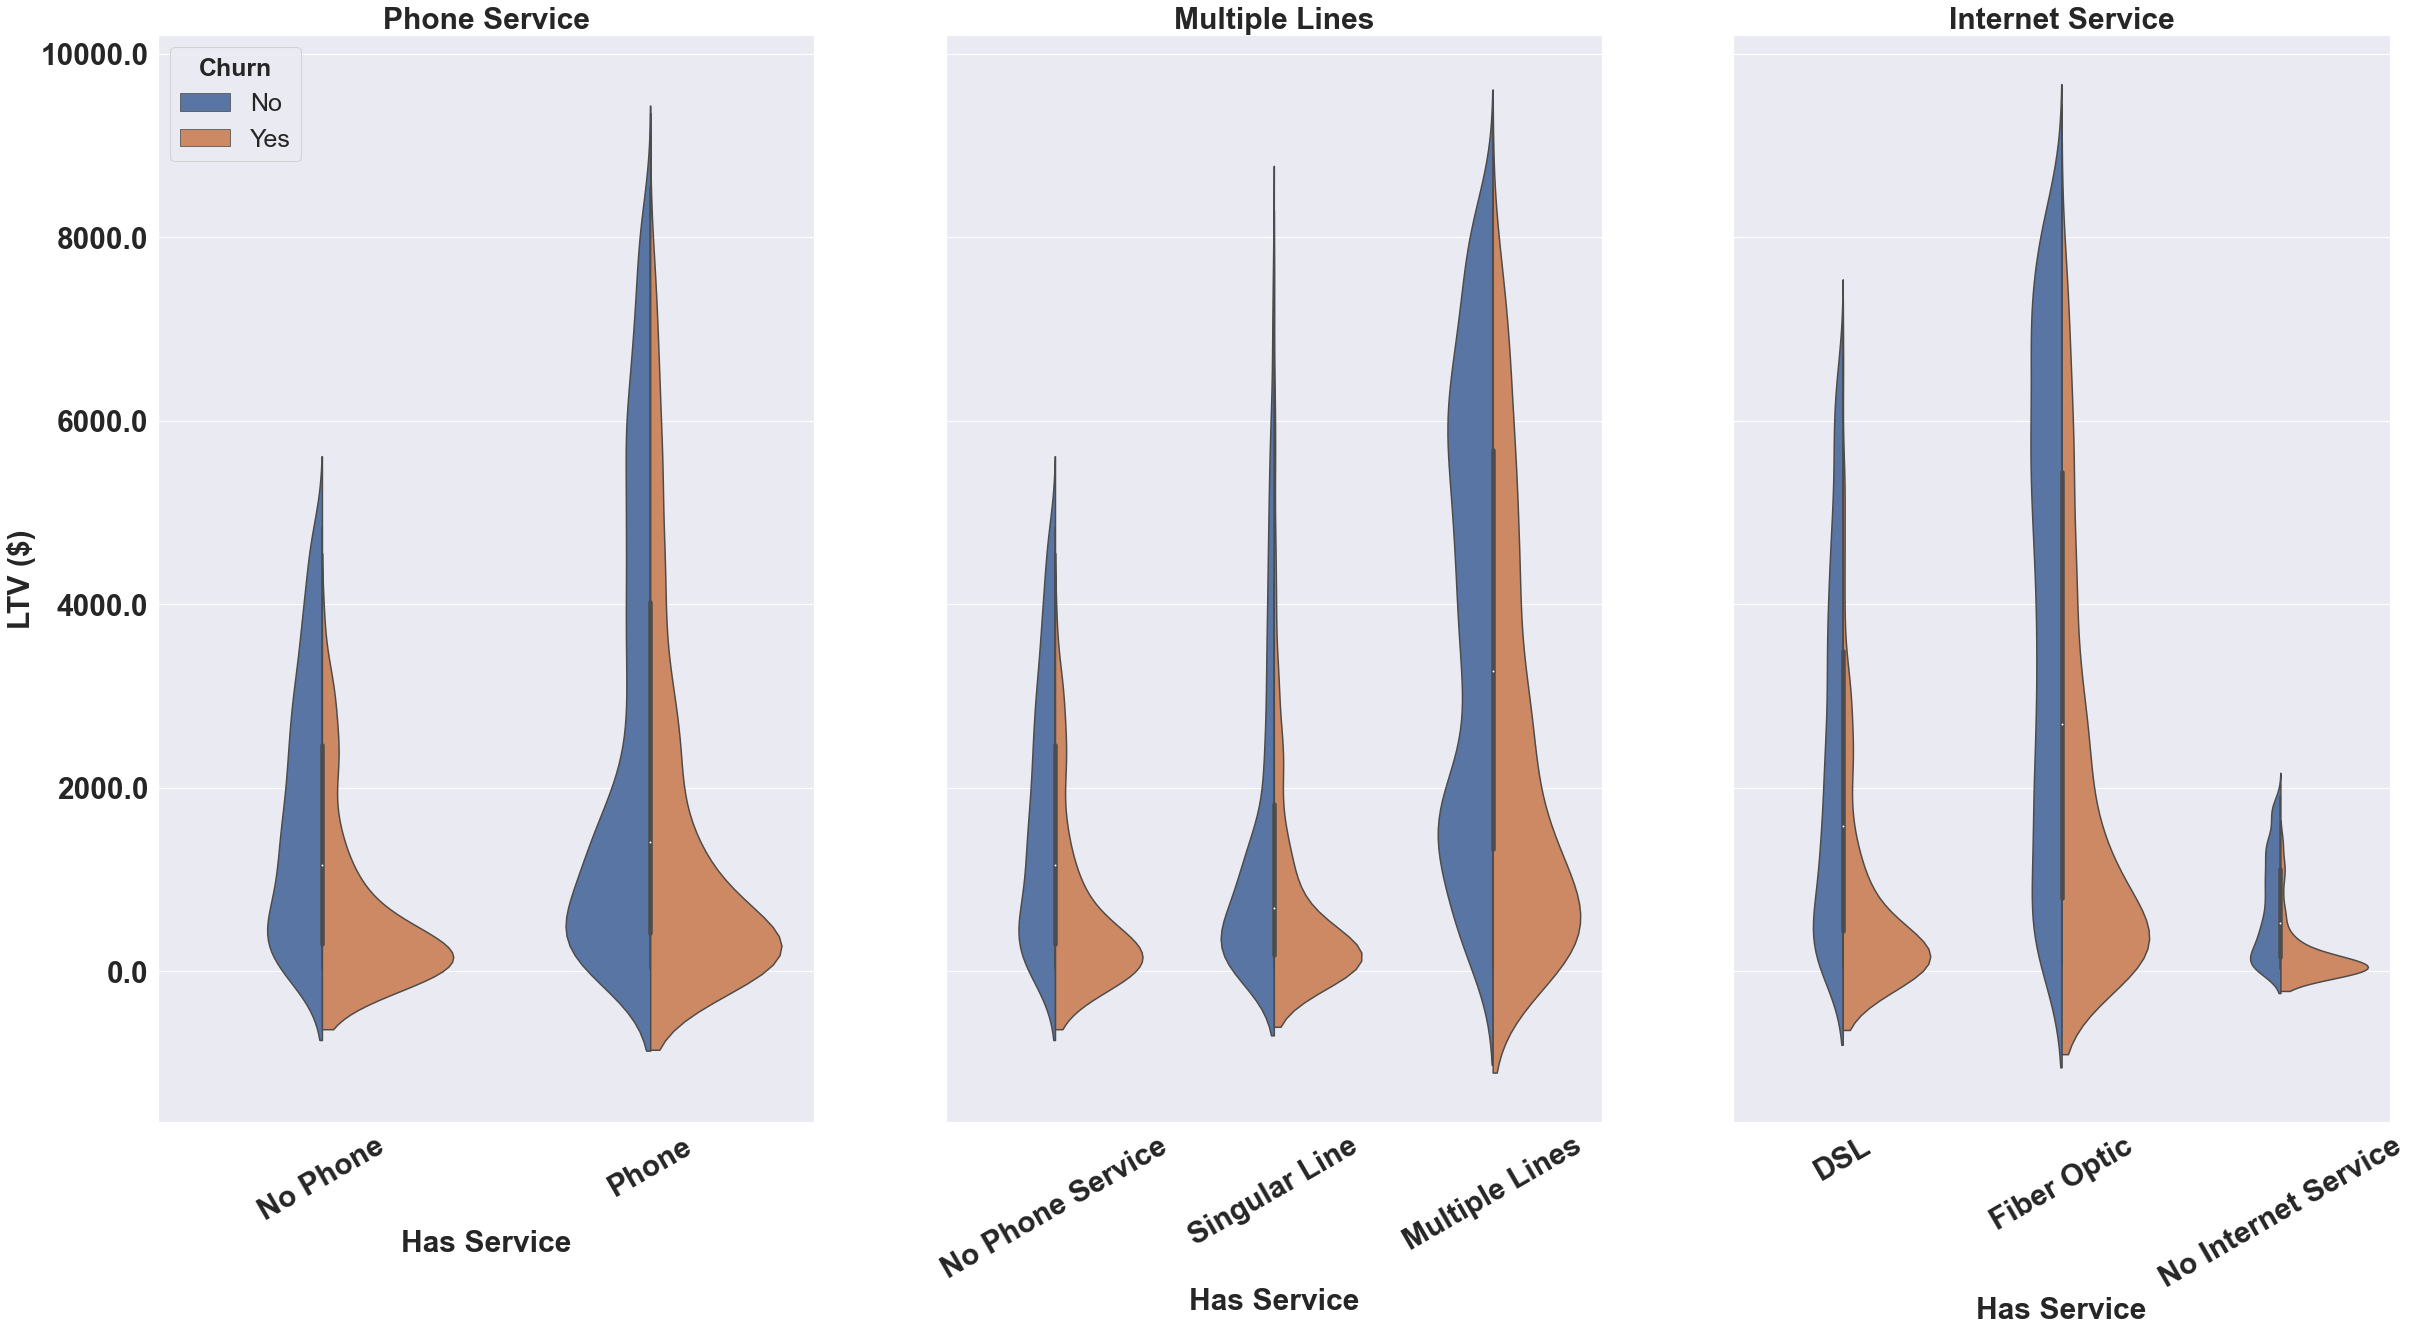

In [32]:
plot_service_charges(df2)

In [33]:
def plot_add_on_service_charges(df):
    
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (40, 50),  sharey = True)
    
    copy1 = df[df.OnlineSecurity != 'No internet service']
    a = sns.violinplot('OnlineSecurity', 'LTV', 'Churn', copy1, split = True, ax = axes[0][0])
    a.set_title('Online Security', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Has Service', fontweight = 'bold', fontsize = 30)
    a.set_xticklabels(a.get_xticks(), size = 30, weight = 'bold')
    a.set_ylabel('LTV ($)', fontweight = 'bold', fontsize = 30)
    a.set_yticklabels(a.get_yticks(), size = 30, weight = 'bold')
    a.legend(loc = 'upper left',fontsize = 25 )
    a.legend_.set_title('Churn', prop = {'size': 25, 'weight':'bold'})

    copy2 = df[df.OnlineBackup != 'No internet service']
    b = sns.violinplot('OnlineBackup', 'LTV', 'Churn', copy2, split = True, ax = axes[0][1])
    b.set_title('Online Backup', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('Has Service', fontweight = 'bold', fontsize = 30)
    b.set_xticklabels(b.get_xticks(), size = 30, weight = 'bold')
    b.set_ylabel('')
    b.legend_.remove()
    
    copy3 = df[df.DeviceProtection != 'No internet service']
    c = sns.violinplot('DeviceProtection', 'LTV', 'Churn', copy3, split = True, ax = axes[0][2])
    c.set_title('Device Protection', fontweight = 'bold', fontsize = 30)
    c.set_xlabel('Has Service', fontweight = 'bold', fontsize = 30)
    c.set_xticklabels(c.get_xticks(), size = 30, weight = 'bold')
    c.set_ylabel('')
    c.legend_.remove()
    
    copy4 = df[df.TechSupport != 'No internet service']
    d = sns.violinplot('TechSupport', 'LTV', 'Churn', copy4, split = True, ax = axes[1][0])
    d.set_title('Tech Support', fontsize = 30, fontweight = 'bold')
    d.set_xlabel('Has Service', fontsize = 30, fontweight = 'bold')
    d.set_xticklabels(d.get_xticks(), size = 30, weight = 'bold')
    d.set_yticklabels(d.get_yticks(), size = 30, weight = 'bold')
    #d.set_ylabel('')
    d.set_ylabel('LTV ($)', fontweight = 'bold', fontsize = 30)
    d.legend_.remove()
    
    copy5 = df[df.StreamingTV != 'No internet service']
    e = sns.violinplot('StreamingTV', 'LTV', 'Churn', copy5, split = True, ax = axes[1][1])
    e.set_title('Streaming TV', fontsize = 30, fontweight = 'bold')
    e.set_xlabel('Has Service', fontweight = 'bold', fontsize = 30)
    e.set_xticklabels(e.get_xticks(), size = 30, weight = 'bold')
    e.set_ylabel('')
    e.legend_.remove()
    
    copy6 = df[df.StreamingMovies != 'No internet service']
    f = sns.violinplot('StreamingMovies', 'LTV', 'Churn', copy6, split = True, ax = axes[1][2])
    f.set_title('Streaming Movies', fontweight = 'bold', fontsize = 30)
    f.set_xlabel('Has Service', fontsize = 30, fontweight = 'bold')
    f.set_xticklabels(f.get_xticks(), size = 30, weight = 'bold')
    f.set_ylabel('')
    f.legend(loc = 'upper left',fontsize = 25)
    f.legend_.set_title('Churn', prop = {'size': 25, 'weight':'bold'})


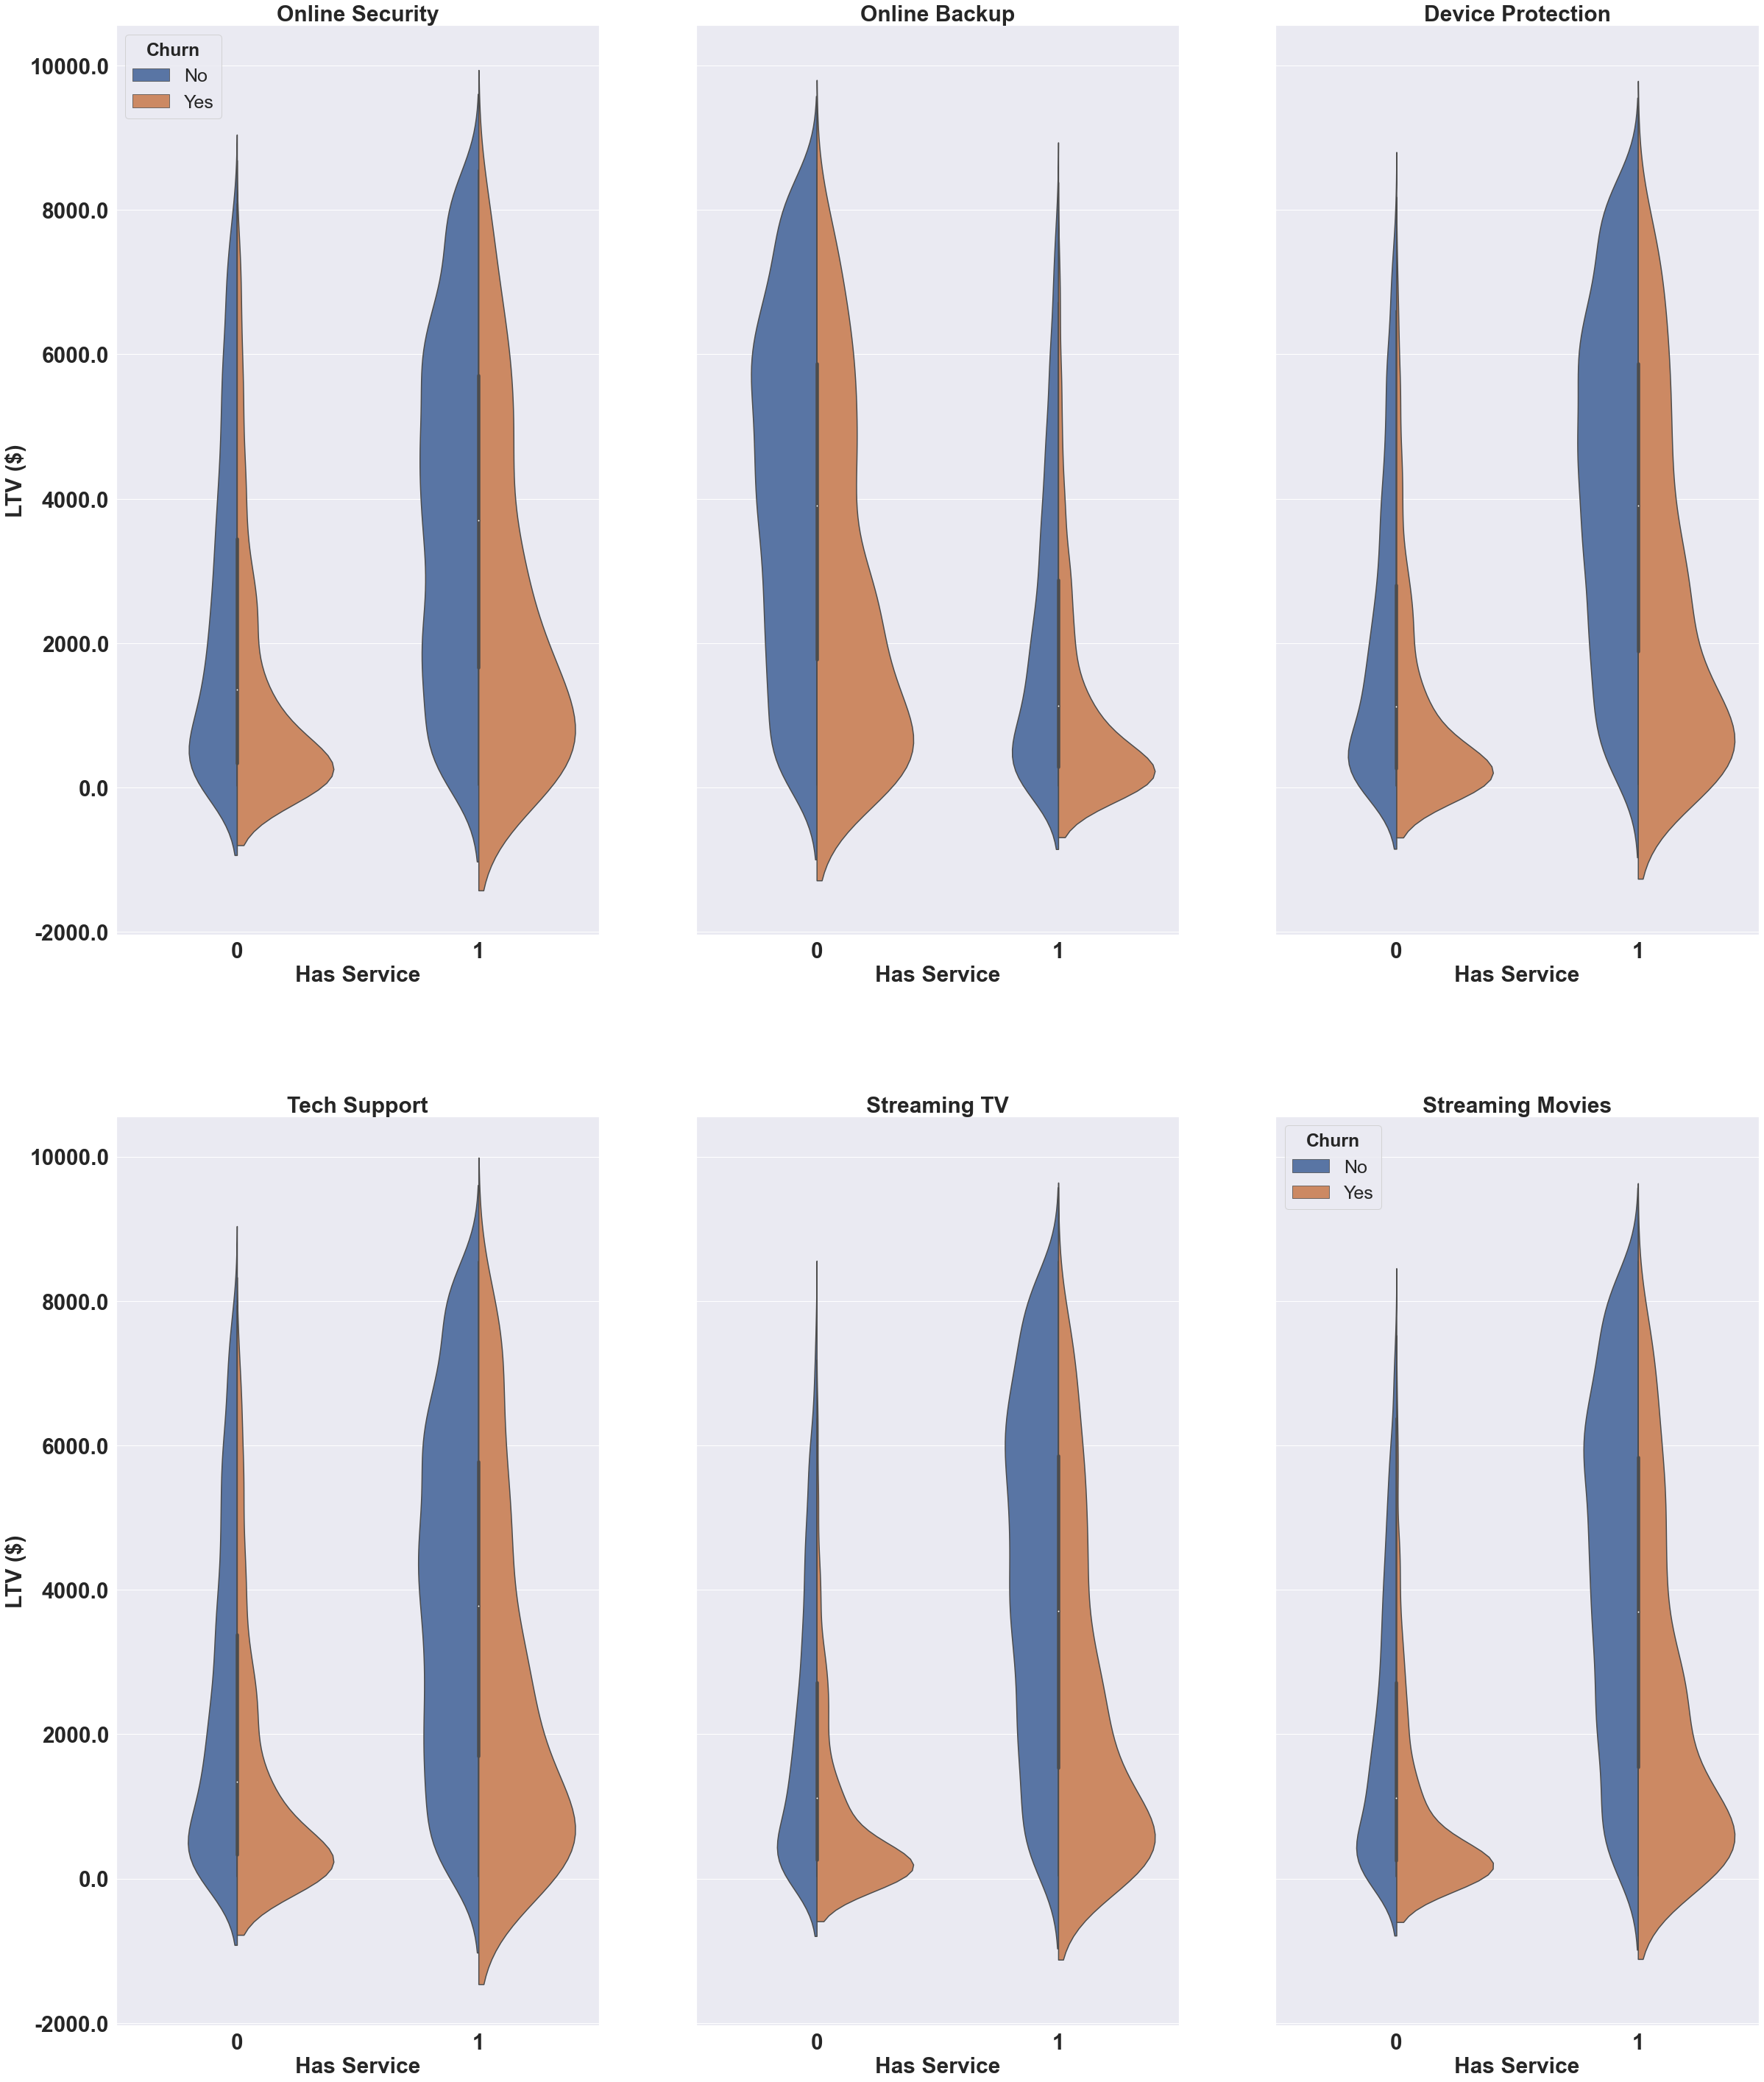

In [34]:
plot_add_on_service_charges(df2)

 For two groups of those who leaked and still are paying the service, what is the proportion of each kinds of contract by each group?

#### 88.55% of those who leaked used a monthly contract, while only 43.0% of current customers use a monthly contract.

In [35]:
df3=df.copy()
#Remove customer IDs and Tenure_Group from the data set
df3 = df3.drop(columns=['customerID','Tenure_Group'])
#Convertin the predictor variable in a binary numeric variable
df3['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df3['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df3)
df_dummies.head()
#df3["LTV"] = df3["tenure"]*df3["MonthlyCharges"]
#df3.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


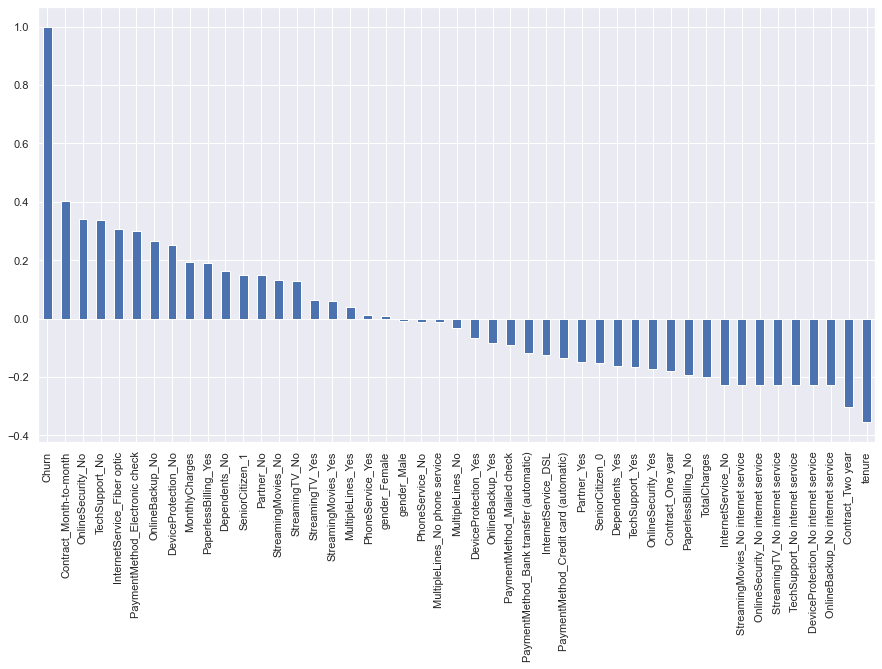

In [36]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn

 Among 'gender', 'Partner', 'Dependents','PhoneService', 'InternetService', 'contract', and 'PaymentMethod', what variable affected the LTV the most?

In [37]:
df4 = df3[['gender', 'Partner', 'Dependents','PhoneService', 'InternetService', 'Contract', 'PaymentMethod']]
df4['LTV'] = df3["tenure"] * df3["MonthlyCharges"]

#Let's convert all the categorical variables into dummy variables
df_dummies2 = pd.get_dummies(df4)
df_dummies2.head()

<ipython-input-37-22db0cfb6ede>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['LTV'] = df3["tenure"] * df3["MonthlyCharges"]


,LTV,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0
1,1936.30,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
2,107.70,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
3,1903.50,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0
4,141.40,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0


In [38]:
# https://github.com/ShivaliPatel/Data-science-projects/blob/master/Telco_customer_churn/Notebooks/Telecom%20Churn%20Prediction-v2.ipynb
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(30,30))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 20, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    ax.figure.axes[-1].yaxis.label.set_size(20)
    plt.title(chart_title, fontsize=20)
    plt.show()

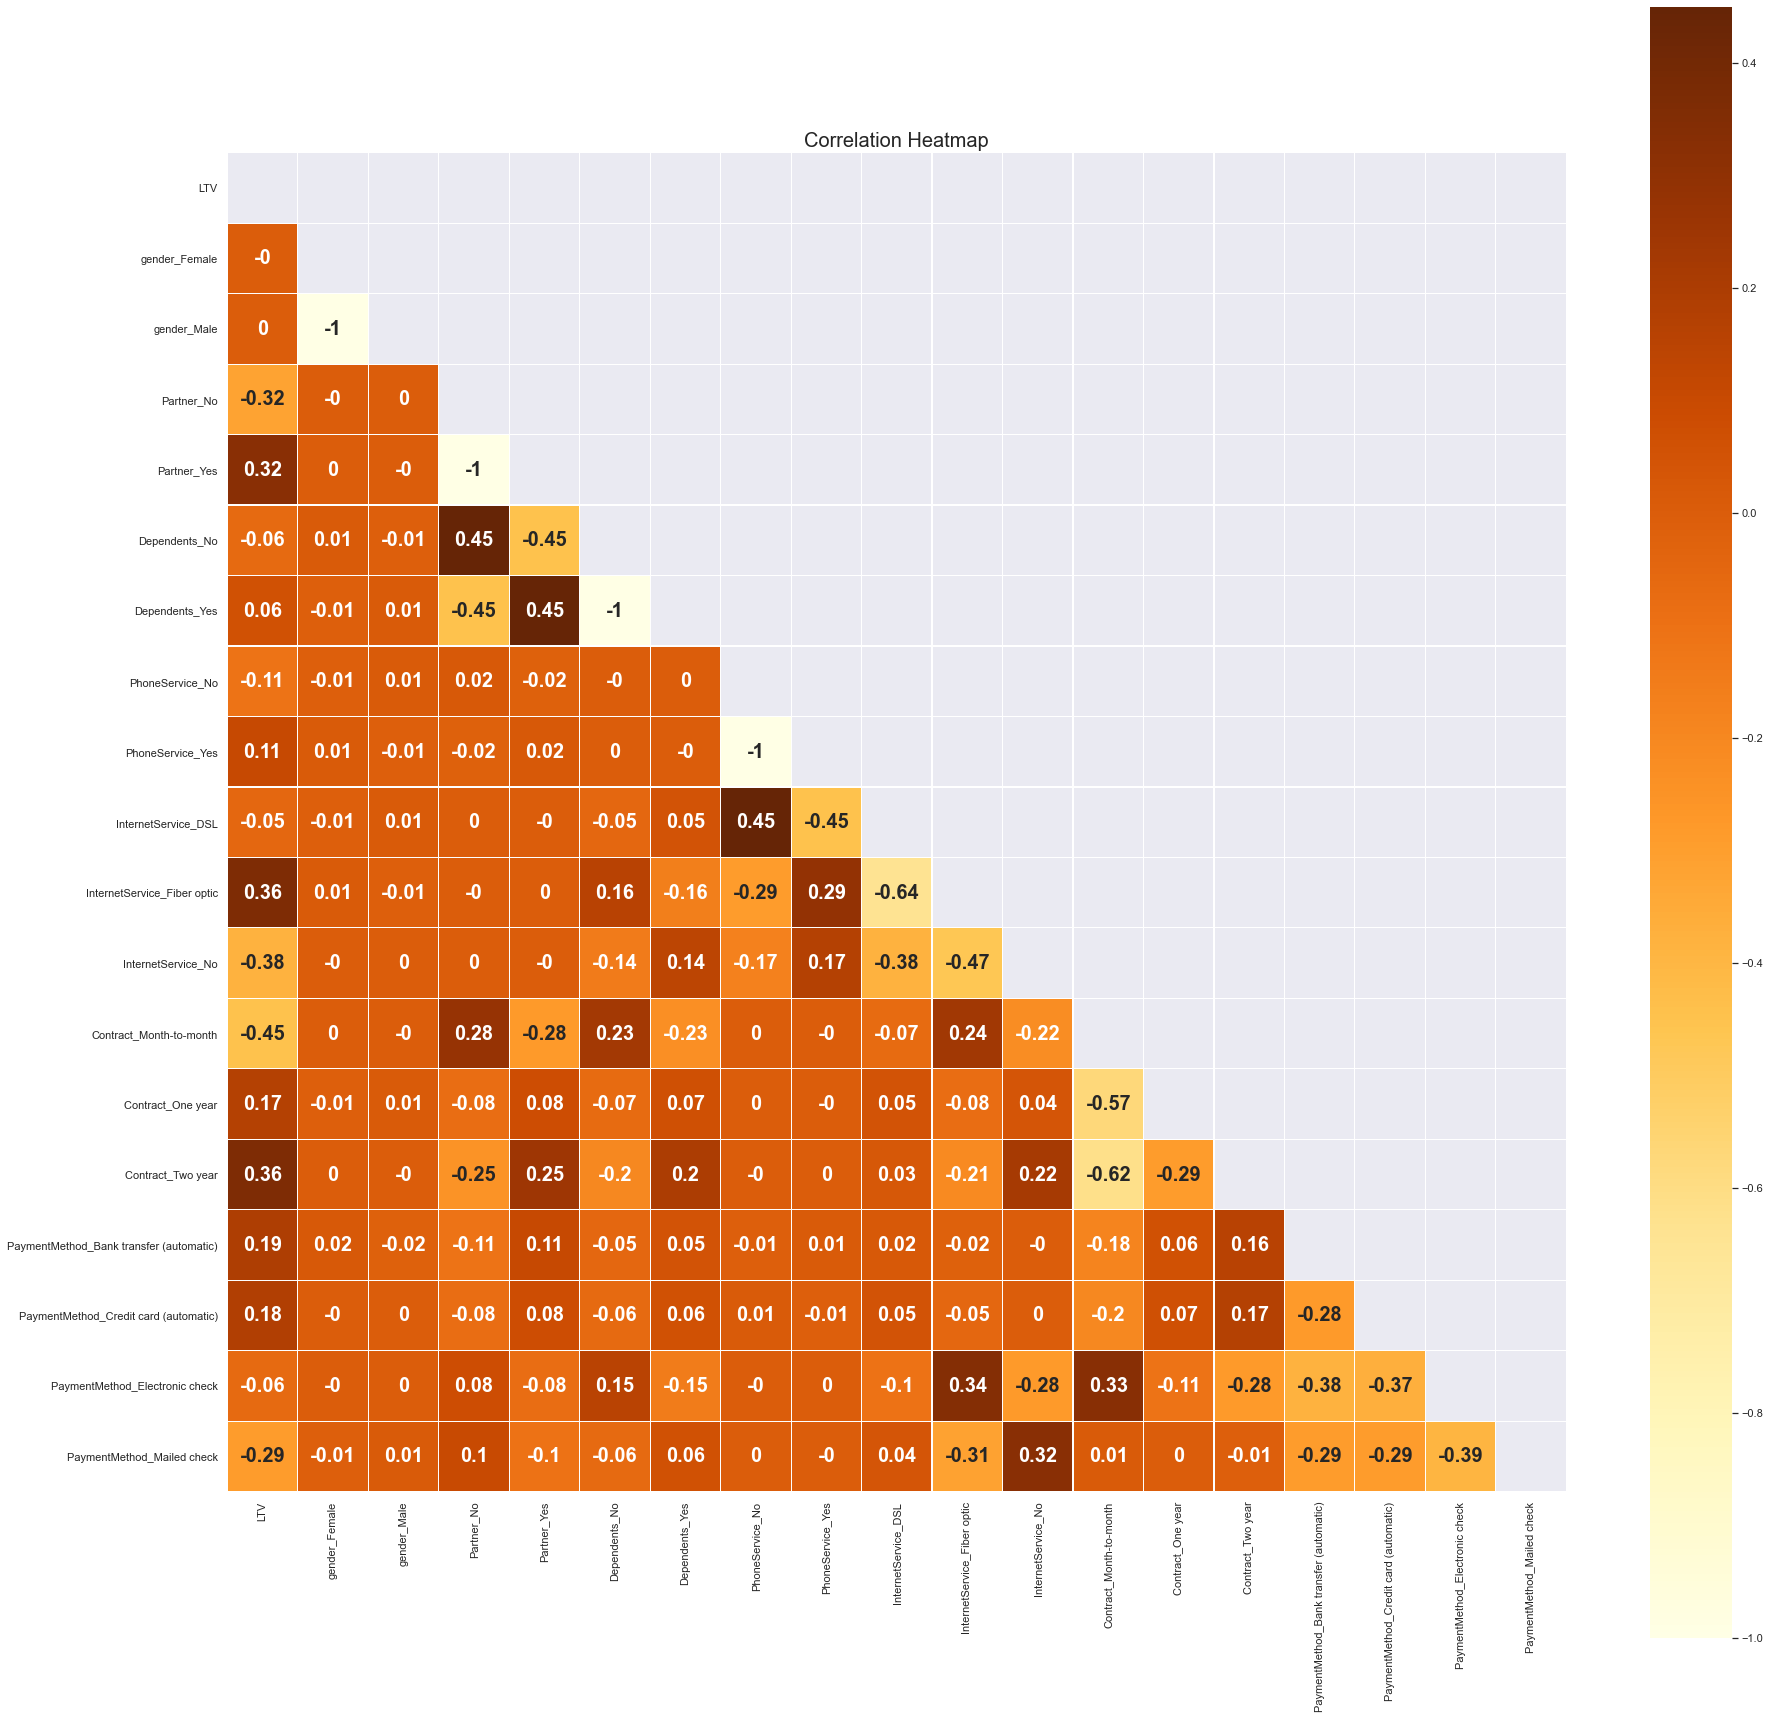

In [39]:
var_corr = round(df_dummies2.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

People use internet service (Fiber Optic) is the most important factor in creating high LTV, and the two year contract is second. The thrid is customers have a partner

https://medium.com/analytics-vidhya/telecom-churn-prediction-model-aa5c71ef944c

Profile of Churn vs Existing customers based on above analysis

Churn customers are likely to

    not have Partner and Dependents; Meaning likely to be single.
    have Internet service and specifically Fiber optics
    not have online security service, online backup service, device protection service, Tech support service
    have streaming TV and streaming Movies services
    be with monthly based plan
    have paperless billing service
    have electronic check payment method

### Using Power BI Key Influencers Visual

#### 6.32 times most likely customer will Churn when contract is "Month-to-month"

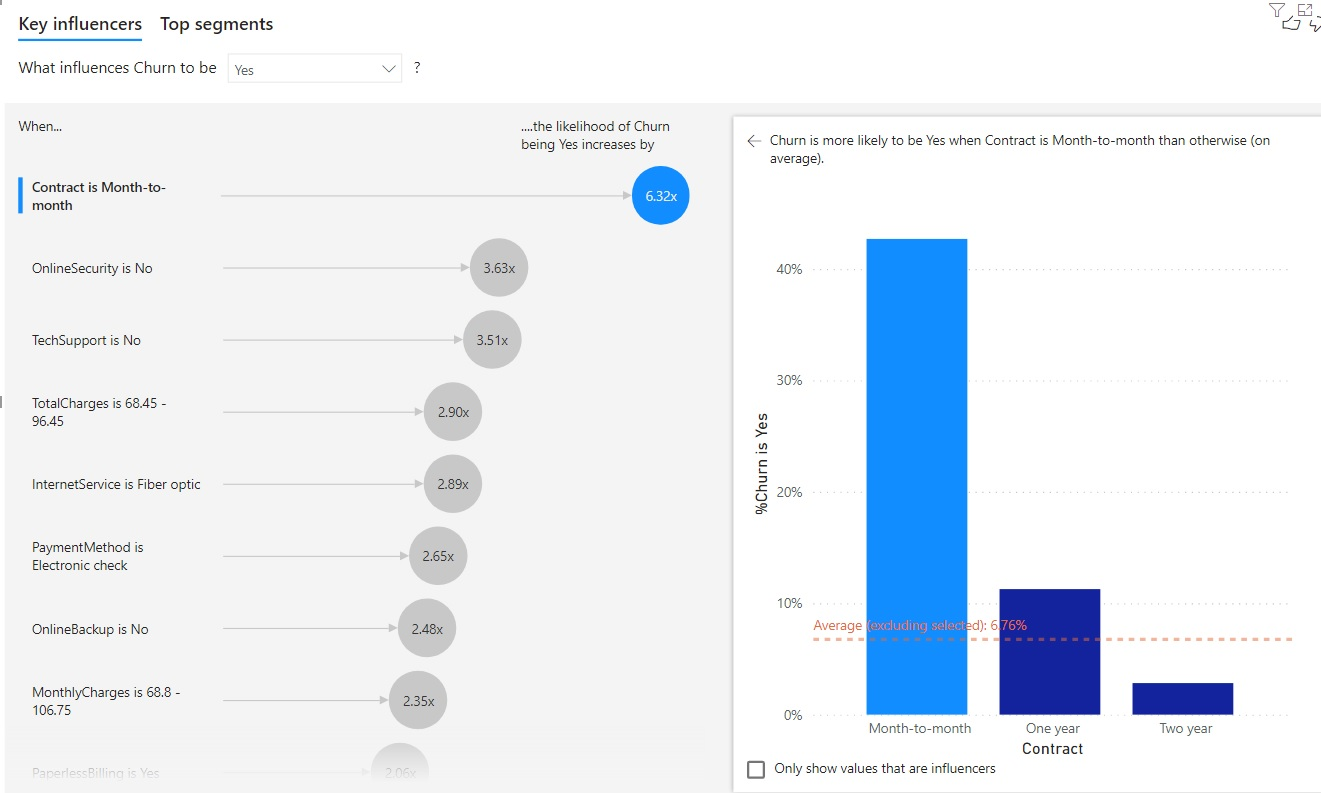

#### 5 larger segments and ranked by % of Churn
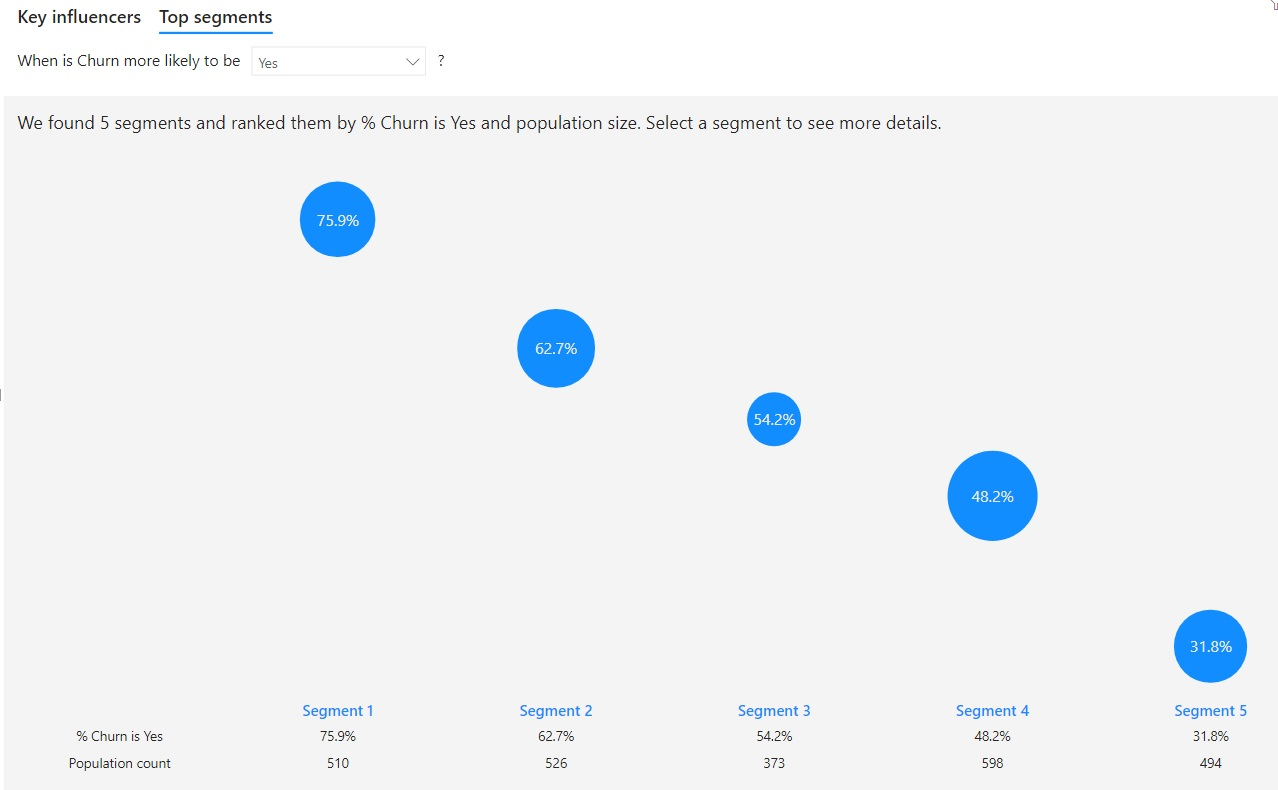

#### First Segement

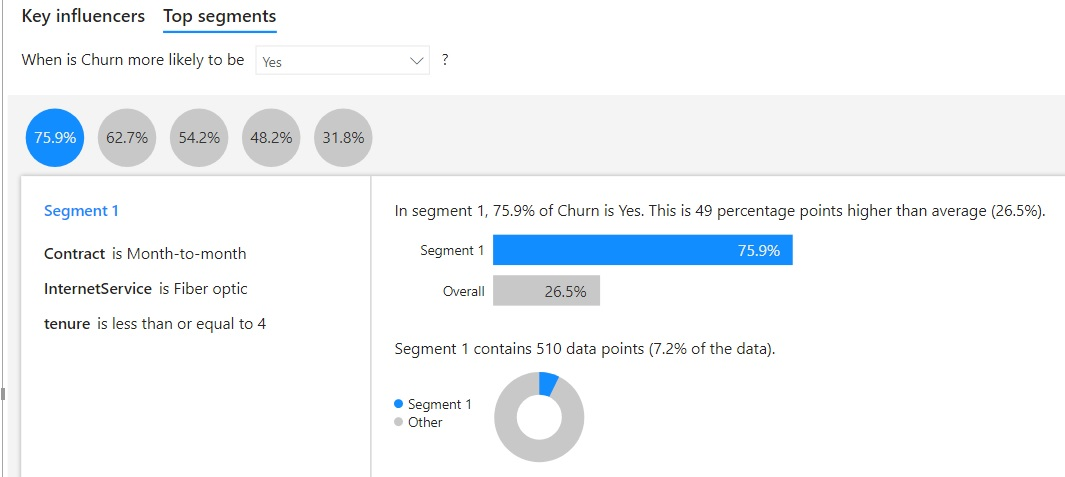

#### 2nd Segement

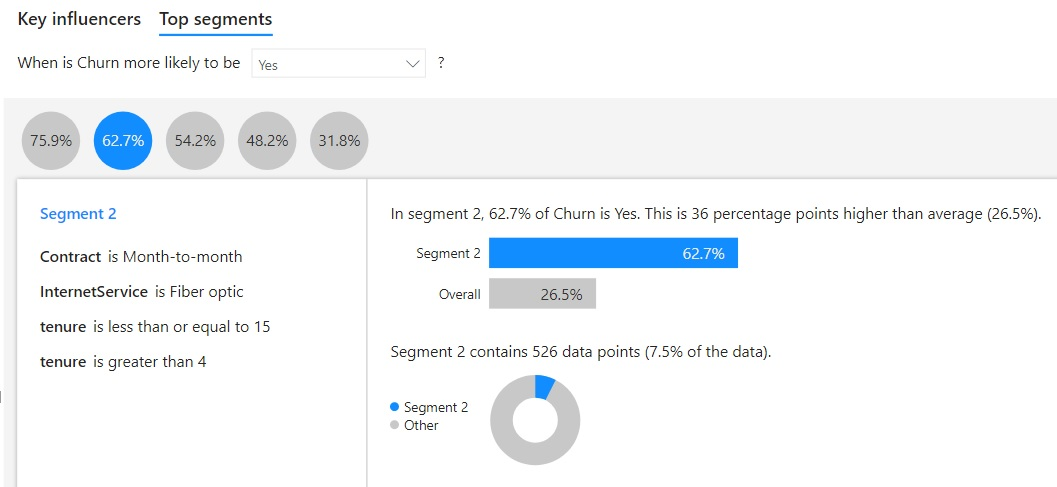

#### 3rd Segement

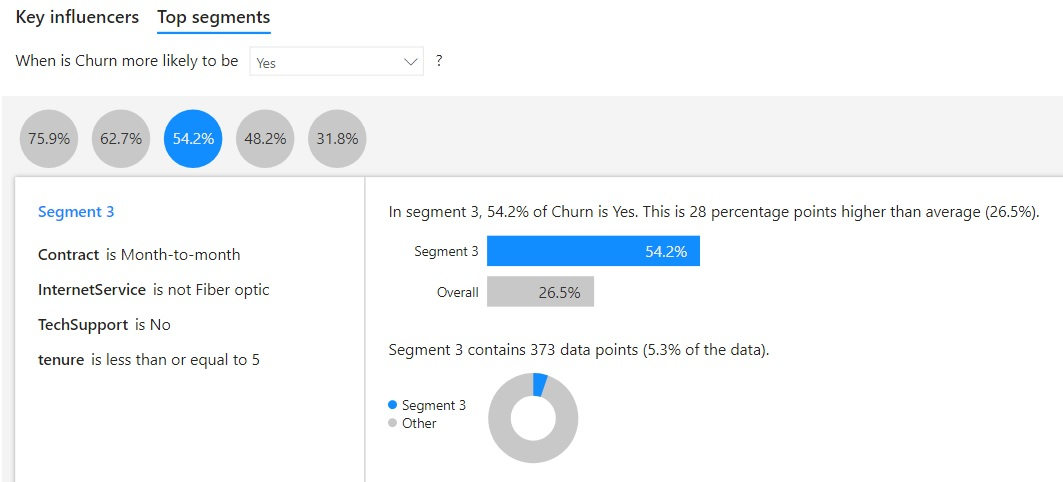

#### 4th Segement

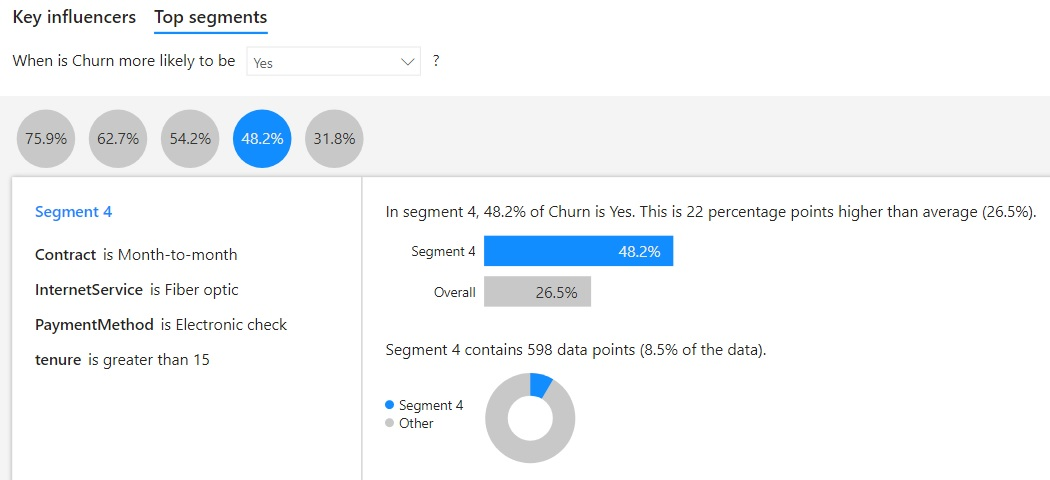

#### 5th Segement

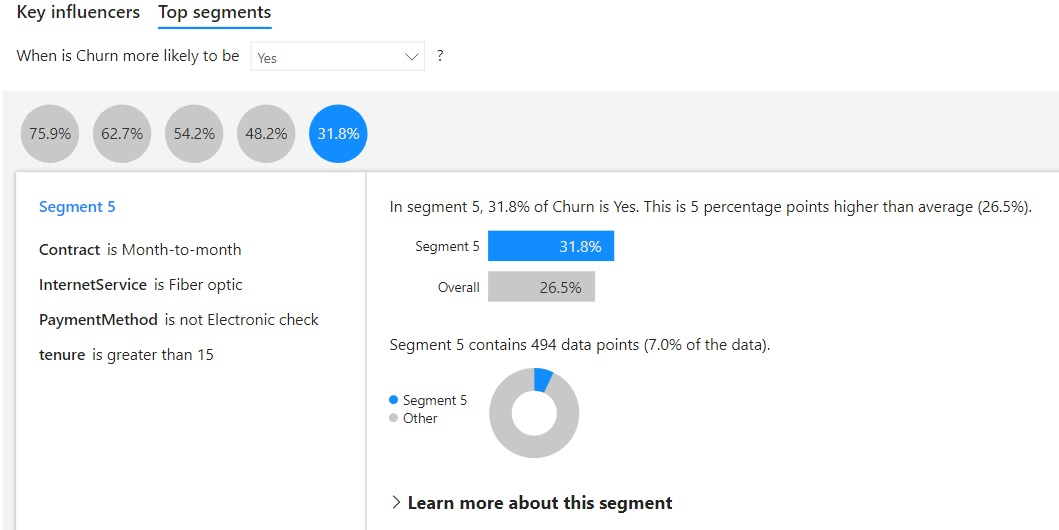